# Neural Network Using Numpy

In [4]:
import numpy as np

Backpropagation is a mathematical algorithm used to train neural networks by adjusting the weights and biases based on the error between the predicted output and the actual output. Here is the mathematical process of backpropagation:

1. Forward Propagation:
    - Calculate the weighted sum of inputs and biases for each neuron in the hidden layer and apply the activation function to get the output of the hidden layer.
    - Calculate the weighted sum of hidden layer outputs and biases for each neuron in the output layer and apply the activation function to get the predicted output.

2. Calculate the Error:
    - Calculate the error between the predicted output and the actual output.

3. Backward Propagation:
    - Calculate the derivative of the activation function for the output layer neurons.
    - Calculate the derivative of the activation function for the hidden layer neurons.
    - Calculate the error gradient for the output layer neurons by multiplying the error with the derivative of the activation function.
    - Calculate the error gradient for the hidden layer neurons by multiplying the error gradient of the output layer with the weights connecting the hidden and output layers and then multiplying it with the derivative of the activation function.
    - Update the weights and biases of the output layer by multiplying the error gradient of the output layer with the learning rate and adding it to the current weights and biases.
    - Update the weights and biases of the hidden layer by multiplying the error gradient of the hidden layer with the learning rate and adding it to the current weights and biases.

4. Repeat Steps 1-3:
    - Repeat steps 1-3 for a specified number of iterations or until the error reaches a desired threshold.

Note: The specific equations and formulas used in backpropagation may vary depending on the activation function and loss function used in the neural network.

In [5]:
# Neural Network 1 hidden layer
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.W1 = np.random.randn(input_size, hidden_size1)
        self.b1 = np.random.randn(hidden_size1)
        self.W2 = np.random.randn(hidden_size1, hidden_size2)
        self.b2 = np.random.randn(hidden_size2)
        self.W3 = np.random.randn(hidden_size2, output_size)
        self.b3 = np.random.randn(output_size)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.sigmoid(self.z3)
        return self.a3

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    # Backward propagation with learning rate
    def backward(self, X, y, output, lr):
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)
        self.z2_error = self.output_delta.dot(self.W3.T)
        self.z2_delta = self.z2_error * self.sigmoid_derivative(self.a2)
        self.z1_error = self.z2_delta.dot(self.W2.T)
        self.z1_delta = self.z1_error * self.sigmoid_derivative(self.a1)
        self.W1 += X.T.dot(self.z1_delta) * lr
        self.W2 += self.a1.T.dot(self.z2_delta) * lr
        self.W3 += self.a2.T.dot(self.output_delta) * lr
        self.b1 += np.sum(self.z1_delta, axis=0) * lr
        self.b2 += np.sum(self.z2_delta, axis=0) * lr
        self.b3 += np.sum(self.output_delta, axis=0) * lr   
        
    def train(self, X, y, lr):
        output = self.forward(X)
        self.backward(X, y, output, lr)
        
    def predict(self, X):
        return self.forward(X)

In [13]:
# Load dataset 
import pandas as pd

data = pd.read_csv('C:/Users/Galan/Documents/01. Learn/Open CV Univ/Machine Learning/Math/Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
# Data preprocessing
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
# Normalisasi data
data = (data - data.min()) / (data.max() - data.min())
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [16]:
# data target
target = data['medv']
data_ready = data.drop(['medv'], axis=1)
data_ready.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [17]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_ready, target, test_size=0.2, random_state=42)
# nn.backward(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1), lr)

In [18]:
# Reshape data
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [32]:
# Training
lr = 0.01
nn = NeuralNetwork(13, 100, 50, 1)
losses = []
for i in range(10000):
    nn.train(X_train, y_train.reshape(-1, 1), lr)
    loss = np.mean(np.square(y_train - nn.forward(X_train)))
    losses.append(loss)
    print(f'Epoch: {i}, Loss: {loss}')  

Epoch: 0, Loss: 0.08213703891110902
Epoch: 1, Loss: 0.08145223117777288
Epoch: 2, Loss: 0.28171240193990443
Epoch: 3, Loss: 0.19572628969572087
Epoch: 4, Loss: 0.19447395749308322
Epoch: 5, Loss: 0.19210130207684328
Epoch: 6, Loss: 0.1864752205810548
Epoch: 7, Loss: 0.16669664917991003
Epoch: 8, Loss: 0.07728020775202714
Epoch: 9, Loss: 0.1792209241806246
Epoch: 10, Loss: 0.19877956977434383
Epoch: 11, Loss: 0.19875531329347496
Epoch: 12, Loss: 0.19872872235216493
Epoch: 13, Loss: 0.1986994462171774
Epoch: 14, Loss: 0.1986670608061224
Epoch: 15, Loss: 0.19863104860683328
Epoch: 16, Loss: 0.19859077166619102
Epoch: 17, Loss: 0.19854543470697364
Epoch: 18, Loss: 0.19849403392224652
Epoch: 19, Loss: 0.19843528456298398
Epoch: 20, Loss: 0.1983675164047067
Epoch: 21, Loss: 0.19828851930731733
Epoch: 22, Loss: 0.19819530897207732
Epoch: 23, Loss: 0.19808376084469748
Epoch: 24, Loss: 0.19794801781662197
Epoch: 25, Loss: 0.19777949255837285
Epoch: 26, Loss: 0.19756510520504672
Epoch: 27, Loss:

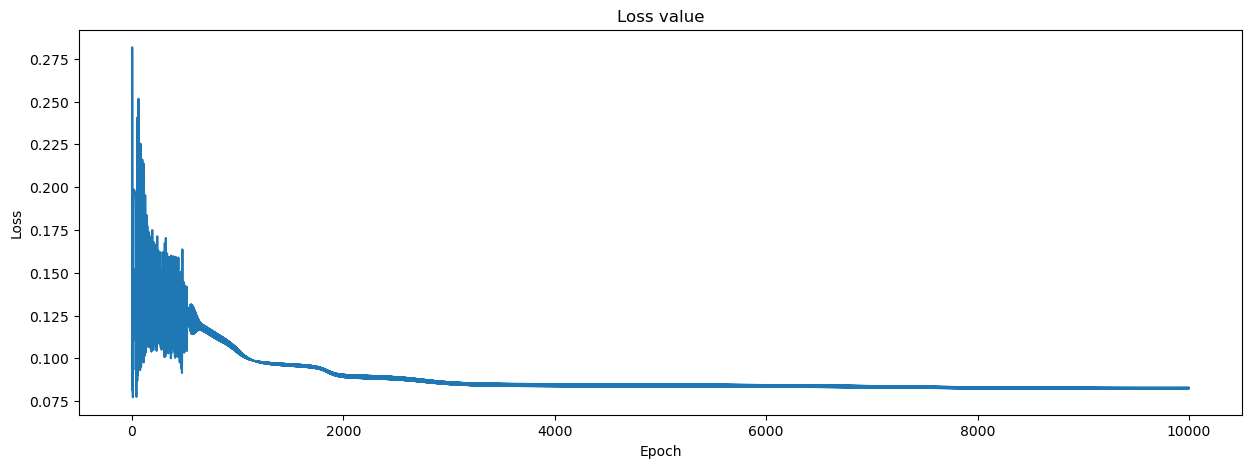

In [33]:
import matplotlib.pyplot as plt

# plot loss value with detail label
plt.figure(figsize=(15, 5))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss value')
plt.show()

Loss: 0.06852739660121944


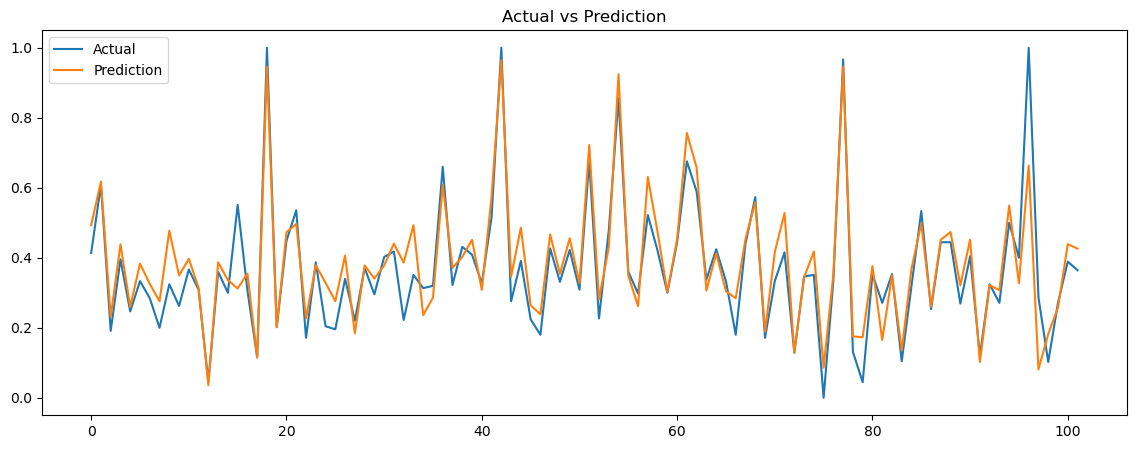

In [34]:
# Test the model
y_pred = nn.predict(X_test)
loss = np.mean(np.square(y_test - y_pred))
print(f'Loss: {loss}')

# Plot the prediction with detail label
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.title('Actual vs Prediction')
plt.show()

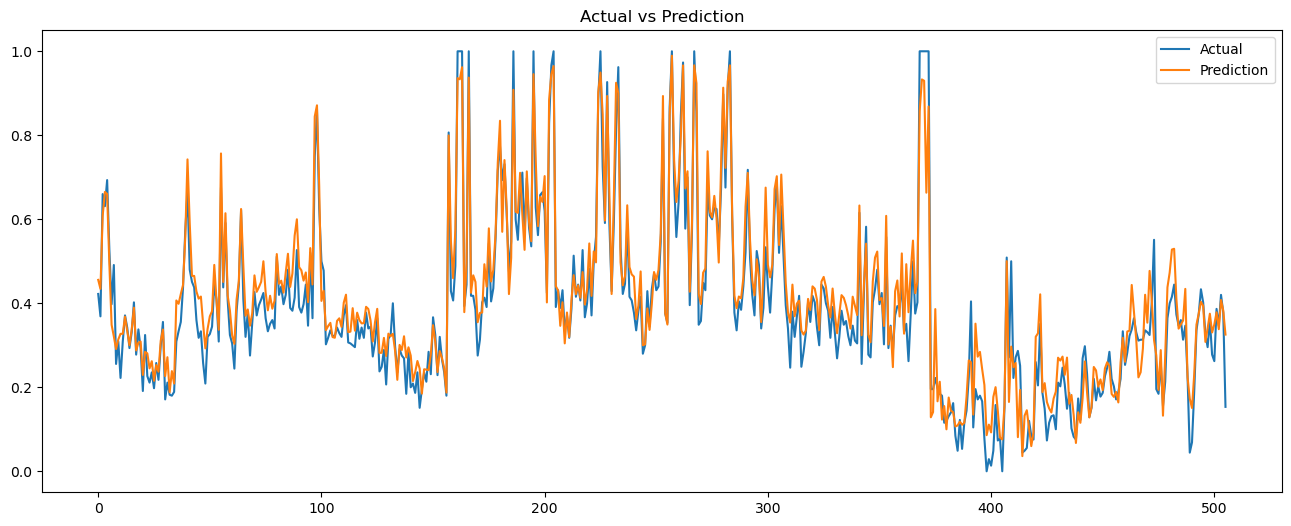

In [35]:
# plot for the whole data with detail label
y_pred = nn.predict(data_ready)
plt.figure(figsize=(16, 6))
plt.plot(target, label='Actual')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.title('Actual vs Prediction')
plt.show()